In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches as mpatch

import json

import cartopy.crs as ccrs

sns.set_context('talk')
sns.set_style('whitegrid')

# Visualization

In [2]:
data_path_nao = '../data/nao.dat'

nao = np.loadtxt(data_path_nao)

data_path = '../data/CRUTEM.4.6.0.0.anomalies.nc'

ds = xr.open_dataset(data_path)
ds.temperature_anomaly.attrs['units'] = u'°C'

In [3]:
nao = xr.DataArray(nao[nao[:, 0] >= 1850, 1:13].flatten()[:len(ds.time)],
                   coords=[('time', ds.time)],
                   name='nao')
nao = nao.where(nao != -99.99)

In [4]:
ds = xr.merge([ds, nao])

In [5]:
global_mean_temperature_anomaly = (
    (ds.temperature_anomaly * np.cos(np.pi * ds.latitude / 180.))
     .mean(('latitude', 'longitude'))
     .resample(time='1Y').mean('time')
)

In [6]:
thesis_file = '../data/thesis_oceanrep.json'
with open(thesis_file) as f:
    thesis_json = json.load(f)

In [7]:
def get_year(value):
    try:
        return int(value[:4])
    except TypeError:
        return value

min_year = 2020
for thesis in thesis_json:
    min_year = min(min_year, get_year(thesis['date']))

In [8]:
years = np.arange(min_year, 2020, 1)
thesis_count = np.zeros_like(years)
for thesis in thesis_json:
    thesis_count[years == get_year(thesis['date'])] += 1

In [9]:
thesis = xr.Dataset({'Thesis': ('time', thesis_count)}, coords={'time': years})

# Principle of proportional ink

In [ ]:
fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.8:0.2:-3j].T.reshape(-1, 2)

l = .1
r = l / 2

ax.add_patch(mpatch.Circle(grid[0], r, color='cornflowerblue'))
ax.add_patch(mpatch.Circle(grid[1], r*np.sqrt(2), color='cornflowerblue'))
ax.add_patch(mpatch.Circle(grid[2], 2*r, color='cornflowerblue'))

ax.add_patch(mpatch.Rectangle(grid[3] - [l/2, l/2], l, l, color='cornflowerblue'))
ax.add_patch(mpatch.Rectangle(grid[4] - [l*np.sqrt(2)/2, l*np.sqrt(2)/2], l*np.sqrt(2), l*np.sqrt(2), color='cornflowerblue'))
ax.add_patch(mpatch.Rectangle(grid[5] - [l, l], 2*l, 2*l, color='cornflowerblue'))

ax.add_patch(mpatch.Rectangle(grid[6] - [l/2, l/2], l, l, color='cornflowerblue'))
ax.add_patch(mpatch.Rectangle(grid[7] - [l*np.sqrt(2)/2, l/2], l*np.sqrt(2), l, color='cornflowerblue'))
ax.add_patch(mpatch.Rectangle(grid[8] - [l, l/2], 2*l, l, color='cornflowerblue'))

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.savefig("../img/1_proportional_ink.svg")

## Visualization along linear axis

In [ ]:
# bad example
nao_seas_median = ds.nao.groupby('time.season').mean()
ax = plt.bar((1, 2, 3, 4), nao_seas_median+.5, bottom=-0.5, tick_label=nao_seas_median.season);
plt.title("Seasonal mean NAO index")
plt.grid(False, axis='x')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig("../img/1_proportial_ink_lin_axis_bad.svg")

In [ ]:
# good example
nao_seas_median = ds.nao.groupby('time.season').mean()
ax = plt.bar((1, 2, 3, 4), nao_seas_median, tick_label=nao_seas_median.season);
plt.title("Seasonal mean NAO index")
plt.grid(False, axis='x')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig("../img/1_proportial_ink_lin_axis_good.svg")

In [ ]:
# bad example
plt.fill_between(
    thesis.time[-5:-1], thesis.Thesis.cumsum('time')[-5:-1],
    thesis.Thesis.cumsum('time')[-6],
    alpha=.4
);
plt.xlabel('year')
plt.title('Cummulative number of Thesis');
plt.grid(False, axis='x')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig("../img/1_proportial_ink_lin_axis_ts_bad.svg", bbox_inches='tight', pad_inches=.1)

In [ ]:
# good example
plt.fill_between(
    thesis.time[-5:-1], thesis.Thesis.cumsum('time')[-5:-1],
#     thesis.Thesis.cumsum('time')[-6],
    alpha=.4
);
plt.xlabel('year')
plt.title('Cummulative number of Thesis');
plt.grid(False, axis='x')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig("../img/1_proportial_ink_lin_axis_ts_good.svg", bbox_inches='tight', pad_inches=.1)

## Visualization along log-axis

In [ ]:
data = ((3e-3, 1000), (3, 3), (100, 30), (500, 2e-1), (50, 1))

dim = len(data[0])
w = 0.75
dimw = w / dim

fig, ax = plt.subplots()
x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.bar(x + i * dimw, [yl-0.001 for yl in y], dimw, bottom=0.001)

ax.set_xticks(x + dimw / 2, map(str, x))
ax.set_yscale('log')

ax.set_xlabel('x')
ax.set_ylabel('y');

plt.savefig("../img/1_proportial_ink_log_axis_bad.svg", bbox_inches='tight', pad_inches=.1)

In [ ]:
dim = len(data[0])

w = 0.75
dimw = w / dim

fig, ax = plt.subplots()
x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.bar(x[:-1] + i * dimw, [yl/y[-1]-1 for yl in y[:-1]], dimw, bottom=1.)

ax.set_xticks(x + dimw / 2, map(str, x))
ax.set_yscale('log')
ax.set_yticks([10**i for i in range(-4, 5, 2)])

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim(4e-5, 1e4)

plt.savefig("../img/1_proportial_ink_log_axis_good.svg", bbox_inches='tight', pad_inches=.1)

## Some basic plots

### Line Plots

In [ ]:
seas_nao = ds.nao.resample(time='Q-NOV', label='right').mean('time')
seas_nao[seas_nao['time.season'] == 'DJF'].plot();
plt.ylabel("DJF NAO");
plt.savefig("../img/1_line_plot.svg", bbox_inches='tight', pad_inches=.1)

In [ ]:
((ds.temperature_anomaly * np.cos(np.pi * ds.latitude / 180.))
 .mean(('latitude', 'longitude'))
 .resample(time='1Y').mean('time')
 .plot()
);
((ds.temperature_anomaly * np.cos(np.pi * ds.latitude / 180.))
 .resample(time='1Y').mean('time')
 .mean(('latitude', 'longitude'))
 .plot()
);

### Scatter plots

In [ ]:
CE = {'longitude': 7.5, 'latitude': 47.5}
ds_CE = ds.sel(CE)

In [ ]:
sns.scatterplot(ds_CE.nao, ds_CE.temperature_anomaly, rasterized=True);#, hue=ds_CE['time.season']);
plt.title("7.5°E 47.5°N");
plt.savefig("../img/1_scatter_plot.svg", bbox_inches='tight', pad_inches=.1)

### Histograms

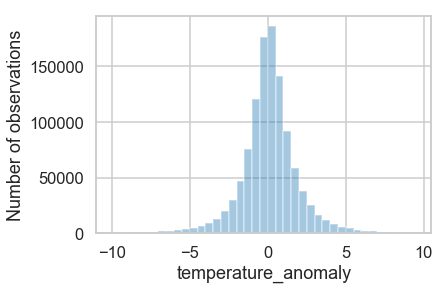

In [10]:
t_anom = ds.temperature_anomaly.stack(z=('longitude', 'latitude', 'time')).dropna('z')
sns.distplot(
    t_anom,
    bins=np.arange(-10, 10, .5),
    kde=False, norm_hist=False
);
plt.ylabel("Number of observations");
plt.savefig("../img/1_histogram.svg", bbox_inches='tight', pad_inches=.1)

In [ ]:
def my_hist(counts, bins):
    fig, ax = plt.subplots()
    bin_size = np.diff(bins)
    for c, b, b_s in zip(counts, bins, bin_size):
        ax.add_patch(mpatch.Rectangle((b, 0.), b_s, c))
    ax.set_xlim(bins[0] - bin_size[0] / 2., bins[-1] + .5 * bin_size[-1])
    ax.set_ylim(0., 1.1 * counts.max());

In [ ]:
counts, bins = np.histogram(t_anom, bins=np.arange(-10, 10.1, .5))
counts = counts / t_anom.count().values
my_hist(counts, bins)
plt.xlabel('temperature anomaly [°C]');

In [ ]:
counts, bins = np.histogram(t_anom, bins=(-10, 0., 1, 2, 3, 10, 11))
counts = counts / t_anom.count().values
my_hist(counts, bins)
plt.xlabel('temperature anomaly [°C]');

In [ ]:
counts, bins = np.histogram(t_anom, bins=(-10, -5., 0., 1, 2, 3, 10, 11))
counts = counts / t_anom.count().values / np.diff(bins)
my_hist(counts, bins)
plt.xlabel('temperature anomaly [°C]');
plt.ylabel('1/°C');

In [ ]:
bin_size = .5
sns.distplot(
    t_anom,
    bins=np.arange(-10, 10, bin_size),
    kde=False, norm_hist=True
);
plt.ylabel("1/°C");

In [ ]:
f, ax = plt.subplots(2, 2)
for a, season in zip(ax.flatten(), ('DJF', 'MAM', 'JJA', 'SON')):
    data = ds_CE.where(ds_CE['time.season']==season)
    a.hexbin(data['nao'], data['temperature_anomaly'], label=season,
             cmap=sns.cm.mpl_cm.Blues, gridsize=20, extent=(-5, 5, -5, 5));
    a.text(-4., 4, season, fontsize=15)
    a.set_xlabel('NAO')
    a.set_ylabel('temperature anomaly [K]')
#     a.set_xlim(-5, 5)
#     a.set_ylim(-5, 5)
#     a.legend()
plt.gcf().set_size_inches(10., 10.)
plt.tight_layout();

In [ ]:
f, ax = plt.subplots(2, 2)
for a, season in zip(ax.flatten(), ('DJF', 'MAM', 'JJA', 'SON')):
    sns.distplot(ds.where(ds['time.season'] == season).nao.dropna('time'), ax=a,label=season,
                 kde=False, norm_hist=True, bins=np.arange(-5., 5.1, .5));
    a.legend();
plt.gcf().set_size_inches(10., 10.)
plt.tight_layout();

# Maps

In [ ]:
ds.temperature_anomaly.isel(time=-5).plot();

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-90))
ds.temperature_anomaly.isel(time=-5).plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines(); ax.gridlines();ax.tissot(alpha=.4);

In [ ]:
ax = plt.axes(projection=ccrs.EckertIV(central_longitude=-90))
ds.temperature_anomaly.isel(time=-5).plot(ax=ax, transform=ccrs.PlateCarree(), rasterized=True)
ax.set_global(); ax.coastlines(); ax.gridlines();# ax.tissot(alpha=.4);

plt.savefig("../img/1_maps.svg", bbox_inches='tight', pad_inches=.1)

In [ ]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-90))
ds.temperature_anomaly.isel(time=-5).plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines(); ax.gridlines();ax.tissot(facecolor='orange', alpha=0.4);

In [ ]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-90))
ds.temperature_anomaly.isel(time=-5).plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines(); ax.gridlines();ax.tissot(alpha=0.4);

In [ ]:
ax = plt.axes(projection=ccrs.NearsidePerspective(central_latitude=45., central_longitude=-90))
ds.temperature_anomaly.isel(time=-5).plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines(); ax.gridlines(); ax.tissot(alpha=0.4);

# Color deficiency plot

In [ ]:
seas_nao[seas_nao['time.season'] == 'DJF'].plot(color='g');

plt.twinx()

((ds.temperature_anomaly * np.cos(np.pi * ds.latitude / 180.))
 .mean(('latitude', 'longitude'))
 .resample(time='1Y').mean('time')
 .plot(color='r')
);
plt.ylabel("Temperatur anomaly");
plt.savefig("../img/1_cvd.svg", bbox_inches='tight', pad_inches=.1);